Nama: Arif Muhammad Laduni

NIM: 1103213003

Tugas: Week 11 Image Classification CIFAR10 Model CNN

Dataset: CIFAR10

Link ChatGPT:[Link](https://chatgpt.com/c/6576dbc4-7c4c-4b3f-82fb-fb92cdfb09f3)

# Import Library

In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


# Load dan pre-proses dataset

In [9]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [10]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

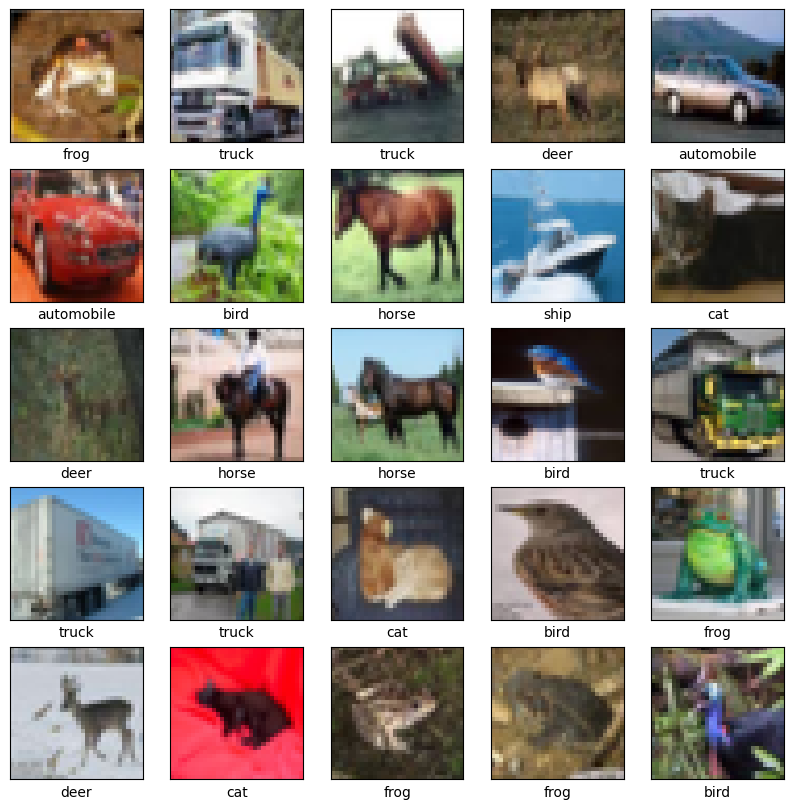

In [11]:
# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Display the first 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Model CNN

In [12]:
# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # Output layer with 10 neurons for 10 classes
])

In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.5465 - accuracy: 0.4319 - val_loss: 1.2607 - val_accuracy: 0.5462
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1869 - accuracy: 0.5767 - val_loss: 1.1255 - val_accuracy: 0.5965
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0540 - accuracy: 0.6278 - val_loss: 1.0575 - val_accuracy: 0.6281
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9603 - accuracy: 0.6608 - val_loss: 0.9441 - val_accuracy: 0.6655
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8911 - accuracy: 0.6894 - val_loss: 0.9739 - val_accuracy: 0.6683
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8348 - accuracy: 0.7079 - val_loss: 0.8943 - val_accuracy: 0.6884
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7906 - accuracy: 0.7226 - val_loss: 0.9094 -

# Evaluasi Model

In [14]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 0.8408 - accuracy: 0.7128 - 3s/epoch - 11ms/step

Test accuracy: 0.7128000259399414


# Visualisasi

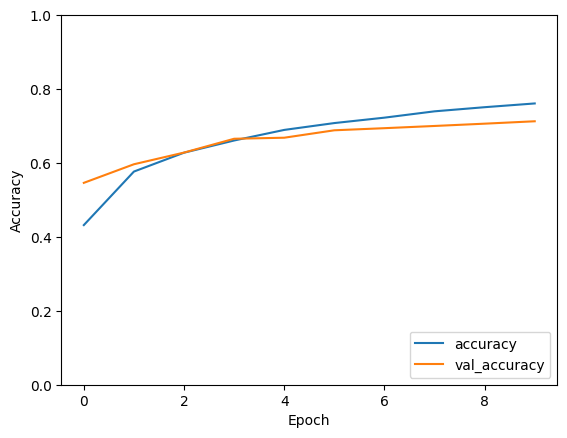

In [15]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

313/313 [==============================] - 4s 12ms/step


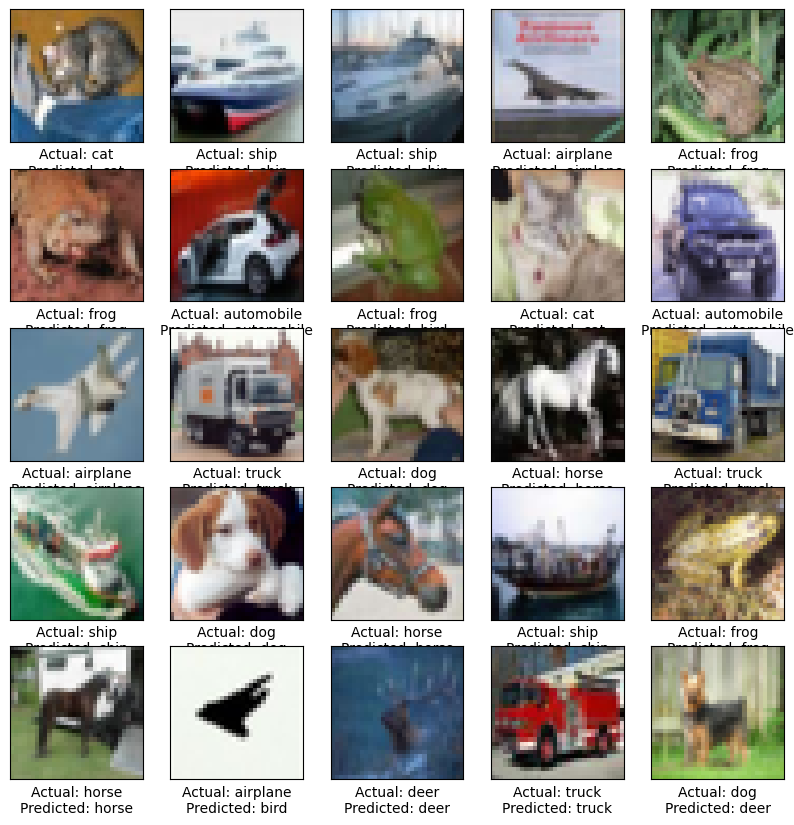

In [16]:
import numpy as np

# Make predictions
predictions = model.predict(test_images)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Display some test images with their predicted labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f'Actual: {class_names[test_labels[i][0]]}\nPredicted: {class_names[predicted_labels[i]]}')
plt.show()
